# From Scratch and Sklearn Implementation for the Radius Nearest Neighbor Classifier

### General Packages

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the Data

In [373]:
df = pd.read_csv('Prostate_Cancer_Preprocessed.csv')

# From Scratch RNN

### Important Packages

In [374]:
from scipy.stats import mode

### Functions

In [375]:
# Function to make standardization for the data
def standardization(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    x_standardized = ((x - mean) / std)
    
    return x_standardized

In [376]:
def split(data, random_state, test_size):
    # Set the random seed for reproducibility
    np.random.seed(random_state)

    # Shuffle the indices of the DataFrame
    shuffled_indices = np.random.permutation(len(data))

    # Calculate the number of samples for testing
    num_test_samples = int(test_size * len(data))

    # Select the first num_test_samples indices for testing
    test_indices = shuffled_indices[:num_test_samples]

    # Select the remaining indices for training
    train_indices = shuffled_indices[num_test_samples:]

    # Split the Data into training and testing
    train = data[train_indices]
    test = data[test_indices]
    
    return train , test

In [377]:
def evaluation(predicted , true):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    conf_matrix = np.zeros((2,2))

    for i in range(len(true)):
        # 1=positive, 0=negative
        if int(predicted[i])==1 and int(true[i])==1:
            # TRUE POSITIVE
            TP += 1

        elif int(predicted[i])==1 and int(true[i])==0:
            # FALSE POSITIVE
            FP += 1

        elif int(predicted[i])==0 and int(true[i])==0:
            # TRUE NEGATIVE
            TN += 1

        elif int(predicted[i])==0 and int(true[i])==1:
            # FALSE NEGATIVE
            FN += 1
    
    conf_matrix[0,0] = TN
    conf_matrix[0,1] = FP
    conf_matrix[1,0] = FN
    conf_matrix[1,1] = TP

    accuracy = (TP+TN) / (TP+TN+FP+FN)
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    specificity = TN / (TN + FP)
    f1 = 2*(precision*recall) / (precision+recall)
    
    return conf_matrix, accuracy, recall, precision, specificity, f1

In [378]:
def plot_confusion(cf_matrix,title):
    fig,ax = plt.subplots()
    group_names = ['TN','FP','FN','TP']
    #group_names = ['TP','TN','FN','TN']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel("True")
    ax.set_title(title)

In [379]:
# Function to calculate the euclidean distance between the sample point and the training data
def euclideanDistance(x_train, sample):
    return np.sqrt( np.sum( np.square( sample - x_train ) ) )

In [380]:
# Function to search for the training points within the radius and return their target value
def findNeighbors(X_train, y_train, test, radius):
    # A list to store the target value of the neighbor points within the radius
    neighbors = []

    # Get the number of instances(rows) in the train data
    no_instances, no_features = X_train.shape

    # Loop on the whole train data
    for i in range(no_instances):
        
        # Calculate the euclidean distance between the test point and the specified train data
        distance = euclideanDistance(X_train[i], test)

        # Check if the distance smaller than the radius so its within the radius so we will append the target value of this specified train data
        if distance <= radius:
            neighbors.append(y_train[i])
    
    return np.array(neighbors)

In [381]:
# Function to return the prediction value by seeing the most often prediction value in the list
def predict(neighbors):
    prediction = mode( neighbors )[0][0]
    
    return prediction

In [382]:
# Function to make the whole RNN classifier and return the prediction
def radiusNearestNeighbors(X_train, y_train, X_test, radius):
    # A list to store the prediction value for each test data point
    y_pred = []

    # Get the number of instances(rows) in the test data
    no_instances, no_features = X_test.shape

    # Loop on the whole test data points
    for i in range(no_instances):
        
        # Get the neighbors within the radius
        neighbors = findNeighbors(X_train, y_train, X_test[i], radius)

        # Get the prediction for this test data point
        prediction = predict(neighbors)

        # Append the value of the prediction in the list
        y_pred.append(prediction)
        
    return y_pred

### Implementation

In [383]:
X = df.drop( 'diagnosis_result_M' , axis = 1)
y = df[ ['diagnosis_result_M'] ]

In [384]:
# Standardizing the data
X = standardization(X)

In [385]:
X = X.to_numpy()
y = y.to_numpy()

In [386]:
# Split the data into 80% train and 20% test
random_state = 42
test_size = 0.2
X_train , X_test = split(X, random_state, test_size)
y_train , y_test = split(y, random_state, test_size)

In [387]:
# Fit the model and Predict
radius = 4
y_pred = radiusNearestNeighbors(X_train, y_train, X_test, radius)

### Evaluation

In [388]:
confusion_matrix, accuracy, recall, precision, specificity, f1_score = evaluation(y_pred, y_test)

C:\Users\Misara\AppData\Local\Temp\ipykernel_9852\3821088853.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if int(predicted[i])==1 and int(true[i])==1:
C:\Users\Misara\AppData\Local\Temp\ipykernel_9852\3821088853.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  elif int(predicted[i])==1 and int(true[i])==0:
C:\Users\Misara\AppData\Local\Temp\ipykernel_9852\3821088853.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  elif int(predicted[i])==0 and int(t

In [389]:
accuracy_sc = round(accuracy*100,2)
recall_sc = round(recall*100,2)
precision_sc = round(precision*100,2)
specificity_sc = round(specificity*100,2)
f1_score_sc = round(f1_score,2)

In [390]:
header = ['RNN']
table = pd.DataFrame( {"Model":header,\
                    "Accuracy(%)":accuracy_sc, "Recall(%)":recall_sc,\
                    "Precision(%)":precision_sc, "Specificity(%)":specificity_sc,\
                    "F1 Score":f1_score_sc
                    })

In [391]:
table

,Model,Accuracy(%),Recall(%),Precision(%),Specificity(%),F1 Score
0,RNN,85.0,100.0,84.21,25.0,0.91


### Confusion Matrix

In [392]:
confusion_matrix

array([[ 1.,  3.],
       [ 0., 16.]])

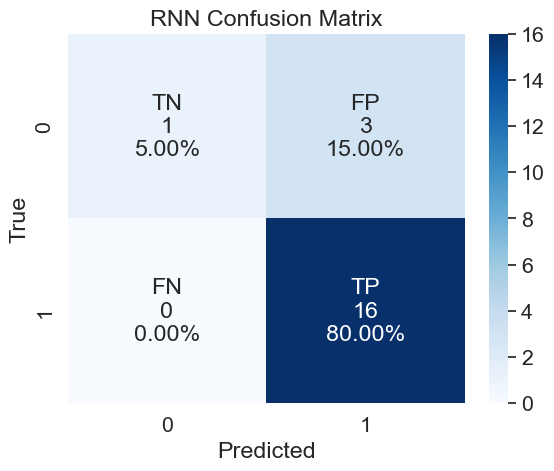

In [393]:
plot_confusion(confusion_matrix, "RNN Confusion Matrix")

# Sklearn RNN

### Important Packages

In [394]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

### Functions

In [395]:
# Function for scaling data
def Standard_Scaler (data, col_names):
    features = data[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    data[col_names] = features
    
    return data

### Implementation

In [396]:
X = df.drop( 'diagnosis_result_M' , axis = 1)
y = df[ ['diagnosis_result_M'] ]

In [397]:
# Standardizing the data
X = Standard_Scaler(X, X.columns)

In [398]:
X = X.to_numpy()
y = y.to_numpy()

In [399]:
# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [400]:
# Reshape y_train and y_test to (n_samples,)
y_train = np.reshape(y_train, (len(y_train),))
y_test = np.reshape(y_test, (len(y_test),))

# Fit the model with the radius value
RNN_model = RadiusNeighborsClassifier(radius= 4)
RNN_model.fit(X_train, y_train)

# Get the accuracy of the model
RNN_score = RNN_model.score(X_test, y_test)

# Predict
y_pred = RNN_model.predict(X_test)

print("Accuracy obtained by RNN models: ", RNN_score*100)

Accuracy obtained by RNN models:  85.0


### Evaluation

In [401]:
accuracy_sk = round(accuracy_score(y_test, y_pred)*100, 2)
recall_sk = round(recall_score(y_test, y_pred)*100, 2)
precision_sk = round(precision_score(y_test, y_pred)*100, 2)
f1_score_sk = round(f1_score(y_test, y_pred), 2)

In [402]:
header = ['RNN']
table = pd.DataFrame( {"Model":header,\
                    "Accuracy(%)":accuracy_sk, "Recall(%)":recall_sk,\
                    "Precision(%)":precision_sk, "F1 Score":f1_score_sk
                    })

In [403]:
table

,Model,Accuracy(%),Recall(%),Precision(%),F1 Score
0,RNN,85.0,100.0,84.21,0.91


### Confusion Matrix

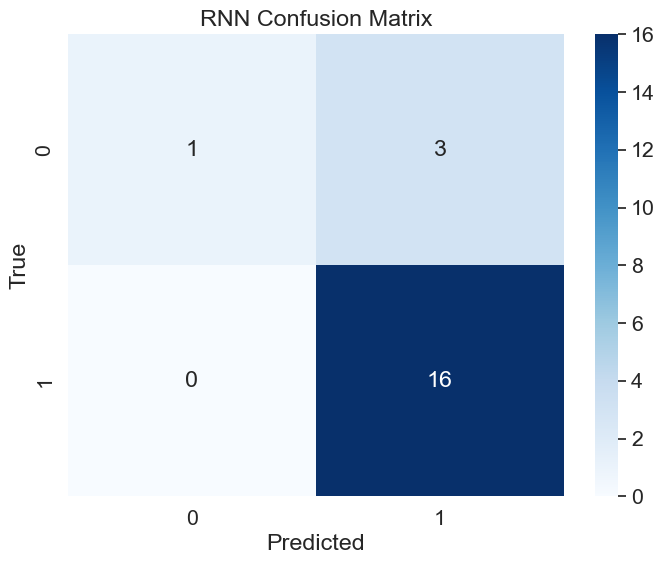

In [404]:
# Define the class names
class_names = np.unique(np.concatenate((y_test, y_pred)))

# Calculate confusion matrix using scikit-learn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title('RNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Cross Validation

In [405]:
# Number of folds is 10
k_folds = KFold(n_splits = 10)

# Get the scores for the 10 models
y = np.reshape(y, (len(y),))
cross_model_scores = cross_val_score(RNN_model, X, y, cv = k_folds)

print("Cross Validation Scores: ", (cross_model_scores*100) )
print("Average CV Score: ", round((cross_model_scores.mean()*100),2) )

Cross Validation Scores:  [ 70.  80.  90. 100.  80.  70.  70.  70.  50.  70.]
Average CV Score:  75.0


## Comparison between From scratch and Sklearn

In [406]:
header = ['RNN Sklearn' , 'RNN From Scratch']
table = pd.DataFrame( {"Model":header,\
                    "Accuracy(%)":[accuracy_sk , accuracy_sc] ,\
                    "Recall(%)":[recall_sk , recall_sc] ,\
                    "Precision(%)":[precision_sk , precision_sc] ,\
                    "F1 Score":[f1_score_sk , f1_score_sc]
                    })

In [407]:
table

,Model,Accuracy(%),Recall(%),Precision(%),F1 Score
0,RNN Sklearn,85.0,100.0,84.21,0.91
1,RNN From Scratch,85.0,100.0,84.21,0.91
